## Basics of OLS in Python

In [217]:
import numpy as np  #линейная алгебра
import pandas as pd #работа с датасетом
%matplotlib inline 
from matplotlib import pyplot as plt #визуализация
import seaborn as sns  #визуализация
sns.set()
from sklearn.datasets import load_boston #встроенный датасет 
from sklearn.model_selection import cross_val_score, KFold #кросс-валидация из пакета с мл
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge #модели
from sklearn.linear_model import LinearRegression

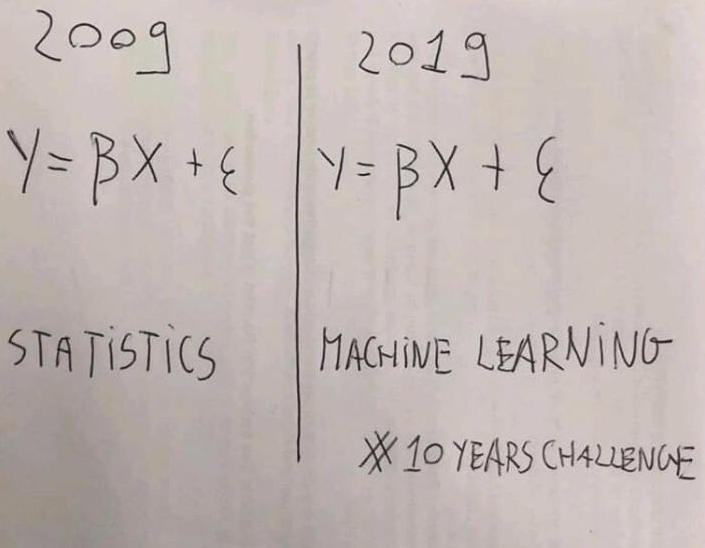

In [2]:
from IPython.display import Image
Image(filename='/Users/aleksandr/Desktop/LpWd3sjYaEU.jpg')

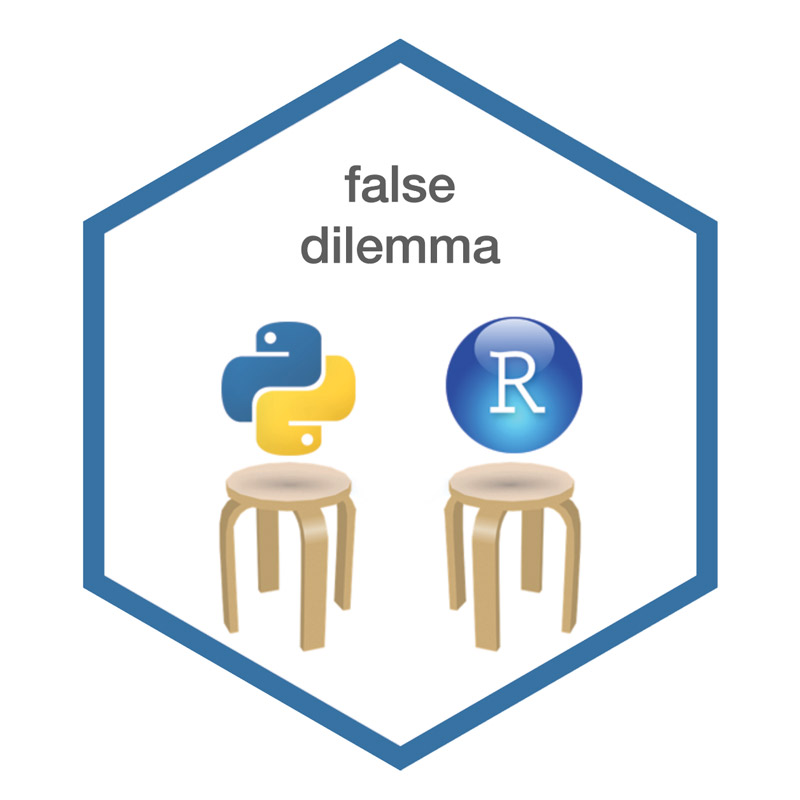

In [4]:
from IPython.display import Image
Image(filename='/Users/aleksandr/Desktop/rrmwxnc-bwd3xbmaregouymbxiw.jpeg')

In [218]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        self._dft = X.shape[0] - 1   
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [219]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [220]:
np.random.seed(20)
x = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]

In [221]:
x_reshape = x.reshape(-1,1)
linear = LinearRegression()
linear.fit(x_reshape, y);

Базовые метрики:

1. Sum of Squared Errors (SSE)
2. Total Sum of Squares (SST)
3. $R^{2}$ 
4. adj $R^{2}$


$SSE = \sum_{i=1}^{m} {(y_{i} - \hat{y_{i}})^{2}}$  - метрика того, насколько далеки прогнозы нашей модели от наблюдаемых значений. Значение 0 указывает на идеальные прогнозы. Ненулевое значение указывает на ошибки. (Нулевого значения на реальных данных быть не может тк мы всегда ожидаем присутствие ошибки в данных)

$SST = \sum_{i=1}^{m} (y - \bar{y})^{2}$ - метрика дисперсии в таргетной переменной. Он измеряется как сумма каждого наблюдения от среднего значения

$R^{2} = 1 - \frac{SSE}{SST}$ - метрика оценки того, какое количество дисперсии объясняется нашей моделью

adj $R^{2} = 1 - \frac{SSE*df_{t}}{SST*df_{e}}$ - модифицированная версия R-квадрата, учитывающая количество фич в модели


In [222]:
s1 = Stats(x_reshape, y, linear)
pretty_print_stats(s1)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


In [223]:
print('R sqaured:', linear.score(x_reshape, y))

R sqaured: 0.9902526784427599


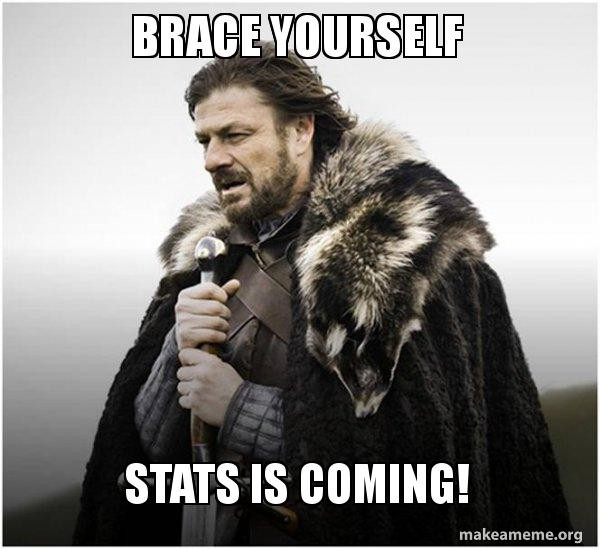

In [193]:
from IPython.display import Image
Image(filename='/Users/aleksandr/Desktop/1_SaKp9J6hxzn6h1G-GJ71LQ.jpeg')

In [224]:
import statsmodels.api as sm

lin_reg = sm.OLS(y, x_reshape).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3303.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.96e-23
Time:                        23:02:41   Log-Likelihood:                -40.197
No. Observations:                  20   AIC:                             82.39
Df Residuals:                      19   BIC:                             83.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1424      0.037     57.475      0.000       2.064       2.220
==============================================================================
Omnibus:                        1.403   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                0.933
Skew:                          -0.174   Prob(JB):                        0.627
Kurtosis:                       2.001   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression Assumptions

1. Linear relationship between target and features
2. No outliers
3. No high-leverage points 
4. Homoscedasticity of error terms
5. Uncorrelated error terms 
6. Independent features

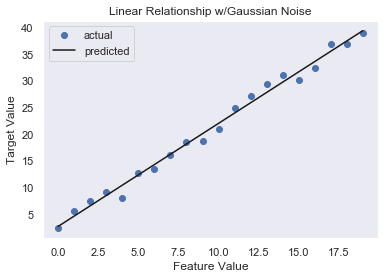

In [225]:
plt.plot(x, y, 'bo', label='actual')
plt.plot(x, linear.predict(x_reshape), 'k', label='predicted')
plt.title('Linear Relationship w/Gaussian Noise')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.grid()
plt.legend();

In [226]:
y_nonlinear = [x**3 + np.random.rand(1)*10 for x in range(20)]

nonlinear = LinearRegression()
nonlinear.fit(x_reshape, y_nonlinear);

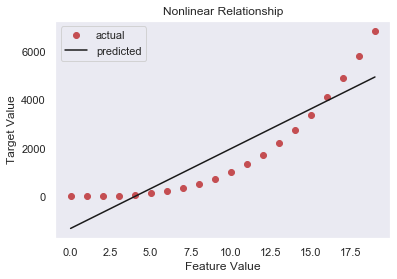

In [227]:
plt.plot(x, y_nonlinear, 'ro', label='actual')
plt.plot(x, nonlinear.predict(x_reshape), 'k', label='predicted')
plt.title('Nonlinear Relationship')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.grid()
plt.legend();

In [228]:
nonlinear.score(x_reshape, y_nonlinear)
s2 = Stats(x_reshape, y_nonlinear, nonlinear)
pretty_print_stats(s2)

sse:     14702044.1585
sst:     87205080.0323
r^2:     0.8314
adj_r^2: 0.8220


In [229]:
pretty_print_stats(s1)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


## Residuals plot

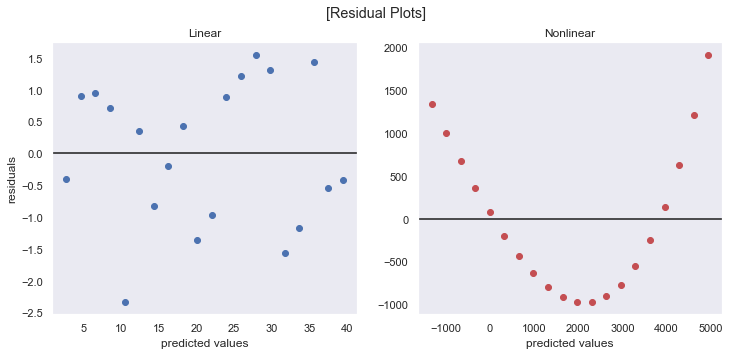

In [230]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(nonlinear.predict(x_reshape), y_nonlinear-nonlinear.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Nonlinear')
axes[1].set_xlabel('predicted values');

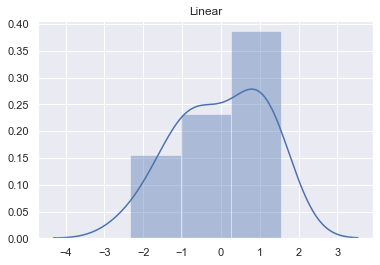

In [231]:
residuals_linear = y - linear.predict(x_reshape)

sns.distplot(residuals_linear);
plt.title('Linear')
plt.show()



In [232]:
from scipy.stats import normaltest
normaltest(residuals_linear)

NormaltestResult(statistic=array([1.71234546]), pvalue=array([0.42478474]))

sse:     80.6927
sst:     87205080.0323
r^2:     1.0000
adj_r^2: 1.0000


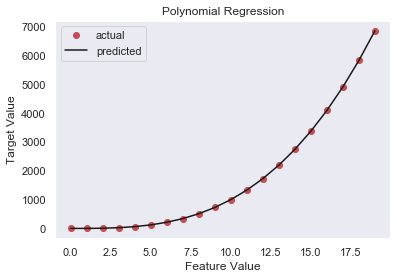

In [233]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

poly.fit(x_reshape, y_nonlinear);

plt.plot(x, y_nonlinear, 'ro', label='actual')
plt.plot(x, poly.predict(x_reshape), 'k', label='predicted')
plt.title('Polynomial Regression')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.grid()
plt.legend();

# R^2 for polynomial regression model
poly.score(x_reshape, y_nonlinear)

# suite of stats
s3 = Stats(x_reshape, y_nonlinear, poly)
pretty_print_stats(s3)

## Outliers

In [234]:
np.random.seed(20)
x = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]
y_outlier = y.copy()
y_outlier[8] = np.array([38])

In [235]:
x_reshape = x.reshape(-1,1)

# fit models
linear_nooutlier = LinearRegression()
linear_nooutlier.fit(x_reshape, y);

linear_outlier = LinearRegression()
linear_outlier.fit(x_reshape, y_outlier);

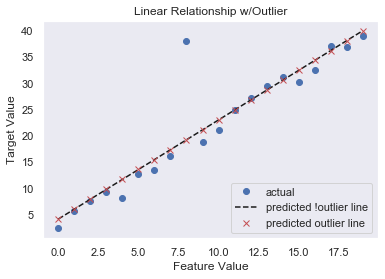

In [236]:
plt.plot(x, y_outlier, 'bo', label='actual')
plt.plot(x, linear_outlier.predict(x_reshape), 'k--', label='predicted !outlier line')
plt.plot(x, linear_outlier.predict(x_reshape), 'rx', label='predicted outlier line')
plt.title('Linear Relationship w/Outlier')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.grid()
plt.legend();

In [237]:
# R^2 for linear model on linear data
print('R^2 w/o outlier: {0:.3f}'.format(linear_nooutlier.score(x_reshape[:20], y)))
print('R^2 w/outlier: {0:7.3f}'.format(linear_outlier.score(x_reshape, y_outlier)))

R^2 w/o outlier: 0.990
R^2 w/outlier:   0.857


In [238]:
s4 = Stats(x_reshape, y, linear_nooutlier)
pretty_print_stats(s4)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


In [239]:
s5 = Stats(x_reshape, y_outlier, linear_outlier)
pretty_print_stats(s5)

sse:     396.3144
sst:     2764.0028
r^2:     0.8566
adj_r^2: 0.8487


## No high-leverage points

In [240]:
np.random.seed(20)
x = np.arange(20)
y_linear_leverage = [x*2 + np.random.rand(1)*4 for x in range(20)]
y_linear_leverage[18] = np.array([55]) 
y_linear_leverage[19] = np.array([58])

In [241]:
# sklearn expects 2D array so have to reshape x
x_reshape = x.reshape(-1,1)

# fit model
linear_leverage = LinearRegression()
linear_leverage.fit(x_reshape, y_linear_leverage);

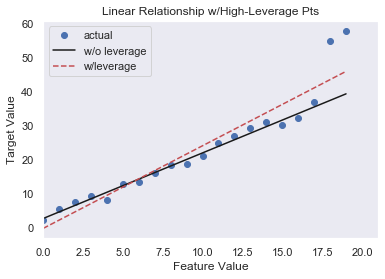

In [242]:
plt.plot(x, y_linear_leverage, 'bo', label='actual')
plt.plot(x, linear.predict(x_reshape), 'k', label='w/o leverage')
plt.plot(x, linear_leverage.predict(x_reshape), 'r--', label='w/leverage')
plt.title('Linear Relationship w/High-Leverage Pts')
plt.xlim(0,21)
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.grid()
plt.legend();

In [243]:
print('R^2 w/o leverage: {0:.3f}'.format(linear.score(x_reshape, y)))
print('R^2 w/leverage: {0:7.3f}'.format(linear_leverage.score(x_reshape, y_linear_leverage)))

R^2 w/o leverage: 0.990
R^2 w/leverage:   0.900


In [244]:
s6 = Stats(x_reshape, y, linear)
pretty_print_stats(s6)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


In [245]:
s7 = Stats(x_reshape, y_linear_leverage, linear_leverage)
pretty_print_stats(s7)

sse:     438.7579
sst:     4373.2096
r^2:     0.8997
adj_r^2: 0.8941


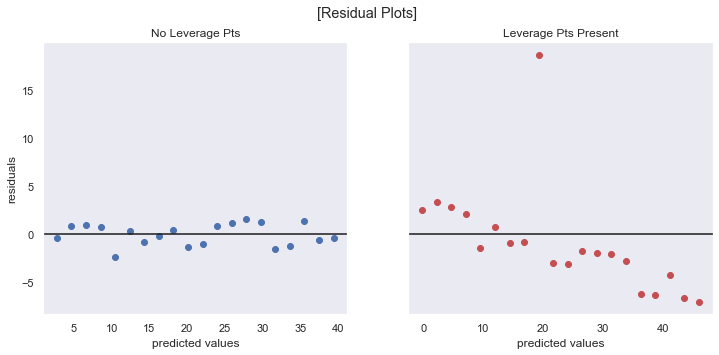

In [246]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('No Leverage Pts')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(linear_leverage.predict(x_reshape), y_outlier-linear_leverage.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Leverage Pts Present')
axes[1].set_xlabel('predicted values');

In [247]:
normaltest(y_outlier-linear_leverage.predict(x_reshape))

NormaltestResult(statistic=array([25.3995098]), pvalue=array([3.05187348e-06]))

## Гомоскедастичность ошибок


In [248]:
np.random.seed(20)
x = np.arange(20)
y_homo = [x*2 + np.random.rand(1) for x in range(20)] 
y_hetero = [x*2 + np.random.rand(1)*2*x for x in range(20)]

In [249]:

x_reshape = x.reshape(-1,1)

# fit models
linear_homo = LinearRegression()
linear_homo.fit(x_reshape, y_homo);

linear_hetero = LinearRegression()
linear_hetero.fit(x_reshape, y_hetero);

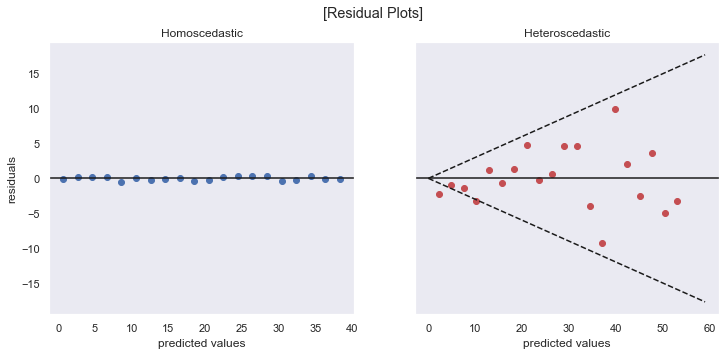

In [250]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear_homo.predict(x_reshape), y_homo-linear_homo.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Homoscedastic')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(linear_hetero.predict(x_reshape), y_hetero-linear_hetero.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Heteroscedastic')
axes[1].set_xlabel('predicted values');
axes[1].plot([x*0.3 for x in range(60)], 'k--')
axes[1].plot([-x*0.3 for x in range(60)], 'k--');

In [251]:
print('R^2 homo: {0:.3f}'.format(linear_homo.score(x_reshape, y_homo)))
print('R^2 hetero: {0:7.3f}'.format(linear_hetero.score(x_reshape, y_hetero)))

R^2 homo: 0.999
R^2 hetero:   0.932


In [252]:
s8 = Stats(x_reshape, y_homo, linear_homo)
pretty_print_stats(s8)

sse:     1.5248
sst:     2615.5733
r^2:     0.9994
adj_r^2: 0.9994


In [253]:
s9 = Stats(x_reshape, y_hetero, linear_hetero)
pretty_print_stats(s9)

sse:     345.5363
sst:     5115.8485
r^2:     0.9325
adj_r^2: 0.9287


## Тренировочный датасет - boston houseprices
пробуем линейную модель


накручиваем L1, L2 регуляризацию


In [254]:
from sklearn.datasets import load_boston
boston = load_boston()

In [255]:

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

In [256]:
data = pd.DataFrame(boston.data)

In [257]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330


**CRIM** per capita crime rate by town


**ZN** proportion of residential land zoned for lots over 25,000 sq.ft. 


**INDUS** proportion of non-retail business acres per town 


**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 


**NOX** nitric oxides concentration (parts per 10 million) 


**RM** average number of rooms per dwelling 


**AGE** proportion of owner-occupied units built prior to 1940 


**DIS** weighted distances to five Boston employment centres 


**RAD** index of accessibility to radial highways 


**TAX** full-value property-tax rate per 10,000usd 


**PTRATIO** pupil-teacher ratio by town 


**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 


**LSTAT** % lower status of the population 



In [258]:
data['PRICE'] = boston.target 

In [259]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330


In [260]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [261]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


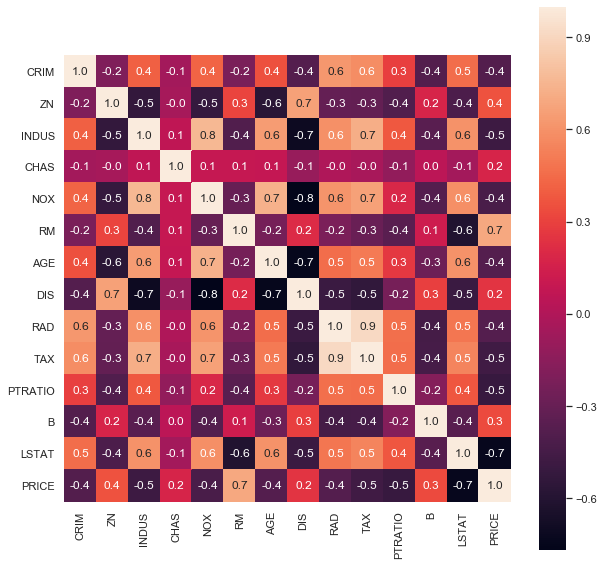

In [262]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True, square= True, fmt='.1f', annot=True)

In [263]:
X = data.drop(['PRICE', 'CHAS'], axis = 1)
y = data['PRICE']

In [264]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

In [265]:
##Обычая модель
lm = LinearRegression()
lm.fit(X, y);

In [266]:
lm.intercept_

36.89195979693247

In [267]:
coeffcients = pd.DataFrame([X.columns,lm.coef_])
coeffcients = coeffcients.rename(columns={0: 'Feature', 1: 'Coefficients'})
coeffcients

,Feature,Coefficients,2,3,4,5,6,7,8,9,10,11
0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.113,0.047,0.040,-17.367,3.850,0.003,-1.485,0.328,-0.014,-0.991,0.010,-0.534


In [268]:
y_pred = lm.predict(X)

In [269]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y, y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y, y_pred))
print('MSE:',metrics.mean_squared_error(y, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y, y_pred)))

R^2: 0.7355165089722999
Adjusted R^2: 0.7290787769391713
MAE: 3.291558836513235
MSE: 22.327578923191638
RMSE: 4.7252067598351335


In [270]:
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     947.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:03:14   Log-Likelihood:                -1528.8
No. Observations:                 506   AIC:                             3082.
Df Residuals:                     494   BIC:                             3132.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0982      0.035     -2.829      0.005      -0.166      -0.030
ZN             0.0494      0.015      3.401      0.001       0.021       0.078
INDUS          0.0166      0.065      0.257      0.797      -0.110       0.144
NOX           -2.2558      3.383     -0.667      0.505      -8.903       4.392
RM             5.9980      0.311     19.280      0.000       5.387       6.609
AGE           -0.0051      0.014     -0.370      0.712      -0.033       0.022
DIS           -0.9725      0.197     -4.927      0.000      -1.360      -0.585
RAD            0.1931      0.067      2.883      0.004       0.061       0.325
TAX           -0.0109      0.004     -2.766      0.006      -0.019      -0.003
PTRATIO       -0.4257      0.110     -3.858      0.000      -0.643      -0.209
B              0.0154      0.003      5.683      0.000       0.010       0.021
LSTAT         -0.4249      0.051     -8.304      0.000      -0.525      -0.324
==============================================================================
Omnibus:                      215.812   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1464.802
Skew:                           1.720   Prob(JB):                         0.00
Kurtosis:                      10.592   Cond. No.                     8.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [271]:
#Ридж L2
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [272]:
ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [273]:
ridge_cv.alpha_

264.30814869741084

In [274]:
cross_val_score(Ridge(ridge_cv.alpha_), X, y, cv=3, 
                scoring='neg_mean_squared_error')

array([-19.57708021, -44.5082309 , -42.21418733])

In [275]:
abs(cross_val_score(Ridge(ridge_cv.alpha_), X, y, cv=3, 
                        scoring='neg_mean_squared_error').mean())

35.433166146564645

In [276]:

ridge = Ridge(alpha= ridge_cv.alpha_)
ridge.fit(X, y)

y_pred=ridge.predict(X)

metrics.mean_absolute_error(y,ridge.predict(X))

3.5146360456404553

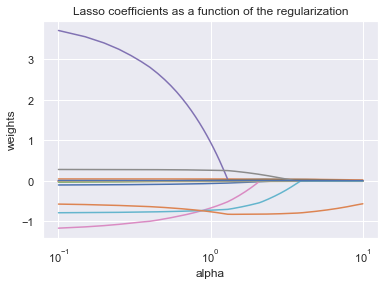

In [277]:
#Лассо L1
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

In [278]:
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [279]:
lasso_cv.alpha_

0.14974874371859298

In [280]:
cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
                scoring='neg_mean_squared_error')

array([-16.67861742, -37.66035492, -72.42091645])

In [281]:
abs(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
                        scoring='neg_mean_squared_error').mean()) 

42.25329625960618

In [282]:
lasso= Lasso(alpha= lasso_cv.alpha_)
lasso.fit(X, y)

y_pred=lasso.predict(X)


metrics.mean_absolute_error(y,lasso.predict(X))

3.345030145580439

In [283]:
supercool = sm.OLS(y, X).fit_regularized(L1_wt=0.14, refit=True)
print(supercool.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     947.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:03:24   Log-Likelihood:                -1528.8
No. Observations:                 506   AIC:                             3082.
Df Residuals:                     494   BIC:                             3132.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0982      0.035     -2.829      0.0

## Тренировочный датасет https://www.kaggle.com/c/bike-sharing-demand/

In [284]:
train=pd.read_csv('/Users/aleksandr/Desktop/bike-sharing-demand/train.csv')
# для винды train=pd.read_csv(r'/Users/aleksandr/Desktop/bike-sharing-demand/train.csv')
df=train.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.840,14.395,81,0.000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.020,13.635,80,0.000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.020,13.635,80,0.000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.840,14.395,75,0.000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.840,14.395,75,0.000,0,1,1


**Features description**

datetime - hourly date + timestamp  


season -  1 = spring, 2 = summer, 3 = fall, 4 = winter



holiday - whether the day is considered a holiday


workingday - whether the day is neither a weekend nor holiday



weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 


2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 


3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 


temp - temperature in Celsius


atemp - "feels like" temperature in Celsius


humidity - relative humidity


windspeed - wind speed


casual - number of non-registered user rentals initiated


registered - number of registered user rentals initiated


**count - number of total rentals** - Dependent Var


In [285]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000
mean,2.507,0.029,0.681,1.418,20.231,23.655,61.886,12.799,36.022,155.552,191.574
std,1.116,0.167,0.466,0.634,7.792,8.475,19.245,8.165,49.960,151.039,181.144
min,1.000,0.000,0.000,1.000,0.820,0.760,0.000,0.000,0.000,0.000,1.000
25%,2.000,0.000,0.000,1.000,13.940,16.665,47.000,7.002,4.000,36.000,42.000
50%,3.000,0.000,1.000,1.000,20.500,24.240,62.000,12.998,17.000,118.000,145.000
75%,4.000,0.000,1.000,2.000,26.240,31.060,77.000,16.998,49.000,222.000,284.000
max,4.000,1.000,1.000,4.000,41.000,45.455,100.000,56.997,367.000,886.000,977.000


In [286]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

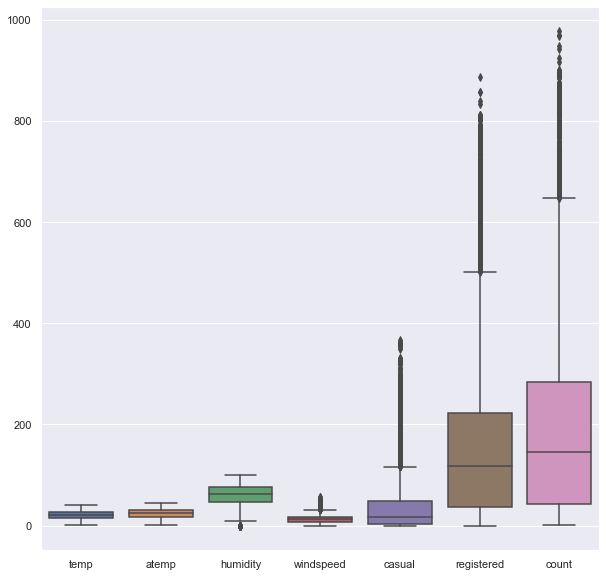

In [287]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [288]:
df = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())] 
df = df[np.abs(df["registered"]-df["registered"].mean())<=(3*df["registered"].std())] 

In [289]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.840,14.395,81,0.000,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.020,13.635,80,0.000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.020,13.635,80,0.000,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.840,14.395,75,0.000,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.840,14.395,75,0.000,0,1,1,4,1


In [290]:
df.drop('datetime',axis=1,inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.840,14.395,81,0.000,3,13,16,0,1
1,1,0,0,1,9.020,13.635,80,0.000,8,32,40,1,1
2,1,0,0,1,9.020,13.635,80,0.000,5,27,32,2,1
3,1,0,0,1,9.840,14.395,75,0.000,3,10,13,3,1
4,1,0,0,1,9.840,14.395,75,0.000,0,1,1,4,1


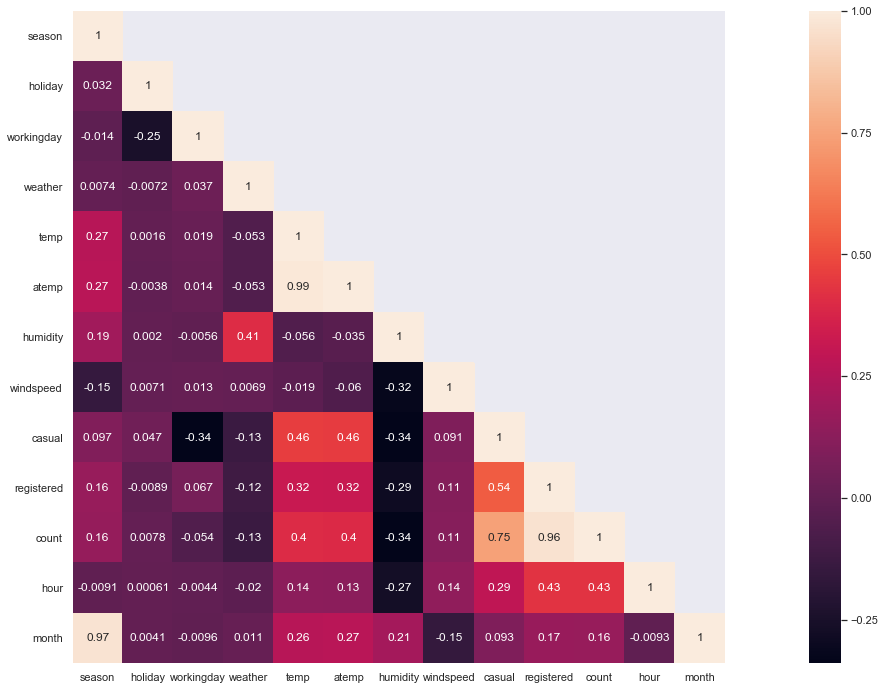

In [291]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [292]:
df.drop(['casual','registered','season','weather'],axis=1,inplace=True)

In [293]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,month
0,0,0,9.840,14.395,81,0.000,16,0,1
1,0,0,9.020,13.635,80,0.000,40,1,1
2,0,0,9.020,13.635,80,0.000,32,2,1
3,0,0,9.840,14.395,75,0.000,13,3,1
4,0,0,9.840,14.395,75,0.000,1,4,1


In [294]:
train_data = df.iloc[:-2000, :]
test_data = df.iloc[-2000:, :]

In [295]:
y_train = train_data['count'].values
X_train = train_data.drop(['count'], axis = 1)

In [296]:
y_test = test_data['count'].values
X_test = test_data.drop(['count'], axis = 1)

In [297]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

49.69942196759233
[-11.60423987 -15.11691235  -1.62090377   7.63603574  -1.86331937
   0.36025223   6.58423636   2.20605085]


In [298]:
predictions = lm.predict(X_train)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'cm', 'axes', 'norm', 'test', 'poly', 'title', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


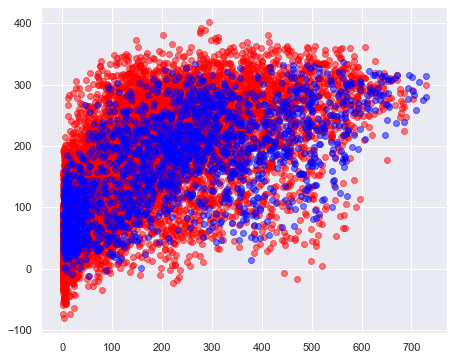

In [299]:
%pylab inline
pylab.figure(figsize = (16,6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(y_train, lm.predict(X_train), alpha = 0.5, color = 'red')
pylab.scatter(y_test, lm.predict(X_test), alpha = 0.5, color = 'blue')

In [300]:
from sklearn.metrics import r2_score
r2_score(y_train,predictions)

0.37256037221483873

In [301]:
metrics.mean_absolute_error(y_train,predictions)

89.41175665002417

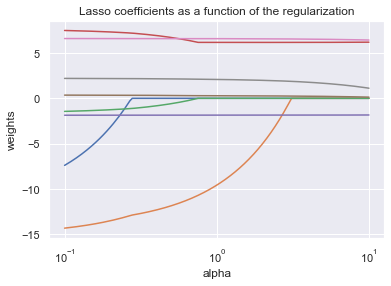

In [302]:
n_alphas = 1000
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

In [303]:
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.10990991,  0.11981982,  0.12972973,  0.13963964,
        0.14954955,  0.15945946,  0.16936937,  0.17927928,  0.18918919,
        0.1990991 ,  0.20900901,  0.21891892,  0.22882883,  0.23873874,
        0.24864865,  0.25855856,  0.26846847,  0.27837838,  0.28828829,
        0.2981982 ,  0.30810811,  0.31801802,  0.32792793,  0.33783784,
        0.34774775,  0.35765766,  0.36756757,  0.37747748,  0.38738739,
        0.39729...
        9.86126126,  9.87117117,  9.88108108,  9.89099099,  9.9009009 ,
        9.91081081,  9.92072072,  9.93063063,  9.94054054,  9.95045045,
        9.96036036,  9.97027027,  9.98018018,  9.99009009, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [304]:
lasso = Lasso(alpha= lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [305]:
y_pred=lasso.predict(X_train)

In [306]:
r2_score(y_train,lasso.predict(X_train))

0.3697217241532227

In [307]:
metrics.mean_absolute_error(y_train,lasso.predict(X_train))

89.80694900067849

In [308]:
n_alphas = 1000
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.01861017e-02, 1.03756668e-02, 1.05687597e-02,
       1.07654461e-02, 1.09657929e-02, 1.11698682e-02, 1.13777413e-02,
       1.15894830e-02, 1.18051653e-02, 1.20248614e-02, 1.22486461e-02,
       1.24765955e-02, 1.27087871e-02, 1.29452998e-02, 1.31862140e-02,
       1.34316117e-02, 1.36815763e-02, 1.39361927e-02, 1.41955477e-02,
       1.44597292e-02, 1.47288272e-0...
       7.04446228e+05, 7.17556092e+05, 7.30909933e+05, 7.44512291e+05,
       7.58367791e+05, 7.72481145e+05, 7.86857151e+05, 8.01500696e+05,
       8.16416760e+05, 8.31610415e+05, 8.47086827e+05, 8.62851257e+05,
       8.78909065e+05, 8.95265713e+05, 9.11926760e+05, 9.28897872e+05,
       9.46184819e+05, 9.63793480e+05, 9.81729841e+05, 1.00000000e+06]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [309]:
ridge_cv.alpha_

94400.64789417603

In [310]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)
metrics.mean_absolute_error(y_train,ridge.predict(X_train))

90.50163940801137

In [311]:
r2_score(y_train, ridge.predict(X_train))

0.3656557915349372

In [312]:
#pip install xgboost
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train, y_train)

[23:04:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [313]:
y_pred = reg.predict(X_train)

In [314]:
r2_score(y_train,reg.predict(X_train))

0.8022877592099428

In [315]:
print('MSE', metrics.mean_absolute_error(y_train,reg.predict(X_train)))

MSE 46.57356901118081


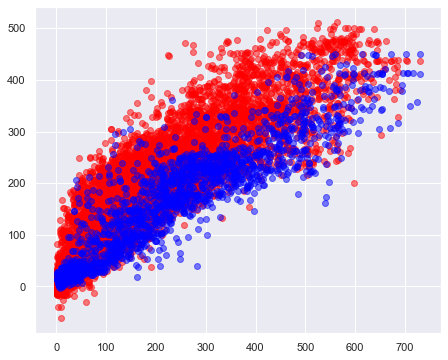

In [316]:
pylab.figure(figsize = (16,6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(y_train, reg.predict(X_train), alpha = 0.5, color = 'red')
pylab.scatter(y_test, reg.predict(X_test), alpha = 0.5, color = 'blue')

In [317]:
from sklearn.ensemble import RandomForestRegressor

In [318]:
regressor = RandomForestRegressor(random_state = 1)
regressor.fit(X_train, y_train)
print('R^2', r2_score(y_train,regressor.predict(X_train)))
print('MSE', metrics.mean_absolute_error(y_train,regressor.predict(X_train)))


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2 0.9735737906180251
MSE 14.892942857142858


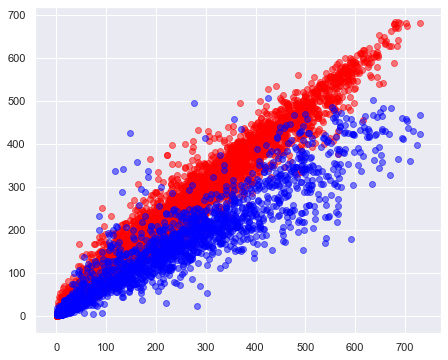

In [319]:
pylab.figure(figsize = (16,6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(y_train, regressor.predict(X_train), alpha = 0.5, color = 'red')
pylab.scatter(y_test, regressor.predict(X_test), alpha = 0.5, color = 'blue')

## Контест https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [320]:

%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



In [321]:
train = pd.read_csv('/Users/aleksandr/Desktop/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/aleksandr/Desktop/house-prices-advanced-regression-techniques/test.csv')

Data fields
Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.


MSSubClass: The building class


MSZoning: The general zoning classification


LotFrontage: Linear feet of street connected to property


LotArea: Lot size in square feet


Street: Type of road access


Alley: Type of alley access


LotShape: General shape of property


LandContour: Flatness of the property


Utilities: Type of utilities available


LotConfig: Lot configuration


LandSlope: Slope of property


Neighborhood: Physical locations within Ames city limits


Condition1: Proximity to main road or railroad


Condition2: Proximity to main road or railroad (if a second is present)


BldgType: Type of dwelling


HouseStyle: Style of dwelling


OverallQual: Overall material and finish quality


OverallCond: Overall condition rating


YearBuilt: Original construction date


YearRemodAdd: Remodel date


RoofStyle: Type of roof


RoofMatl: Roof material


Exterior1st: Exterior covering on house


Exterior2nd: Exterior covering on house (if more than one material)


MasVnrType: Masonry veneer type


MasVnrArea: Masonry veneer area in square feet


ExterQual: Exterior material quality


ExterCond: Present condition of the material on the exterior


Foundation: Type of foundation


BsmtQual: Height of the basement


BsmtCond: General condition of the basement


BsmtExposure: Walkout or garden level basement walls


BsmtFinType1: Quality of basement finished area


BsmtFinSF1: Type 1 finished square feet


BsmtFinType2: Quality of second finished area (if present)


BsmtFinSF2: Type 2 finished square feet


BsmtUnfSF: Unfinished square feet of basement area


TotalBsmtSF: Total square feet of basement area


Heating: Type of heating


HeatingQC: Heating quality and condition


CentralAir: Central air conditioning


Electrical: Electrical system


1stFlrSF: First Floor square feet


2ndFlrSF: Second floor square feet


LowQualFinSF: Low quality finished square feet (all floors)


GrLivArea: Above grade (ground) living area square feet


BsmtFullBath: Basement full bathrooms


BsmtHalfBath: Basement half bathrooms


FullBath: Full bathrooms above grade


HalfBath: Half baths above grade


Bedroom: Number of bedrooms above basement level


Kitchen: Number of kitchens


KitchenQual: Kitchen quality


TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


Functional: Home functionality rating


Fireplaces: Number of fireplaces


FireplaceQu: Fireplace quality


GarageType: Garage location


GarageYrBlt: Year garage was built


GarageFinish: Interior finish of the garage


GarageCars: Size of garage in car capacity


GarageArea: Size of garage in square feet


GarageQual: Garage quality


GarageCond: Garage condition


PavedDrive: Paved driveway


WoodDeckSF: Wood deck area in square feet


OpenPorchSF: Open porch area in square feet


EnclosedPorch: Enclosed porch area in square feet


3SsnPorch: Three season porch area in square feet


ScreenPorch: Screen porch area in square feet


PoolArea: Pool area in square feet


PoolQC: Pool quality


Fence: Fence quality


MiscFeature: Miscellaneous feature not covered in other categories


MiscVal: $Value of miscellaneous feature


MoSold: Month Sold


YrSold: Year Sold


SaleType: Type of sale


SaleCondition: Condition of sale

In [322]:
#дропаем колонку за ненадобностью
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

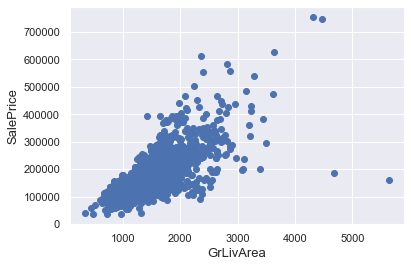

In [323]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

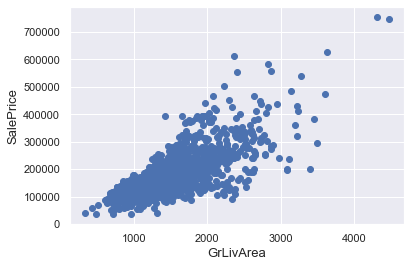

In [324]:
#убиваем выбросы
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



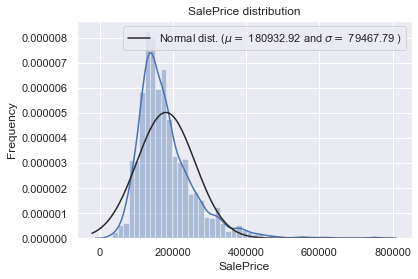

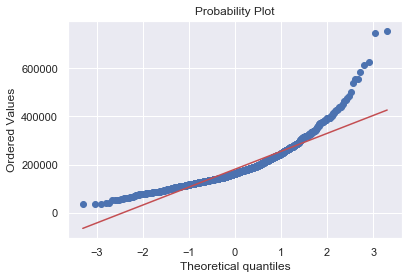

In [325]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



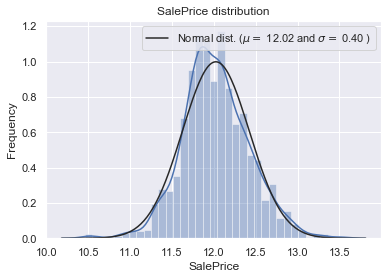

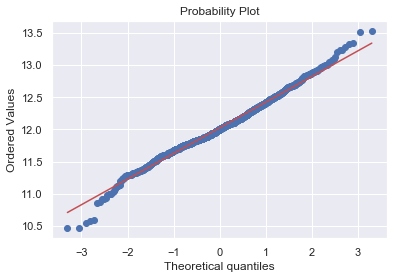

In [326]:
#log(1+x) трансформация
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [327]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [328]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

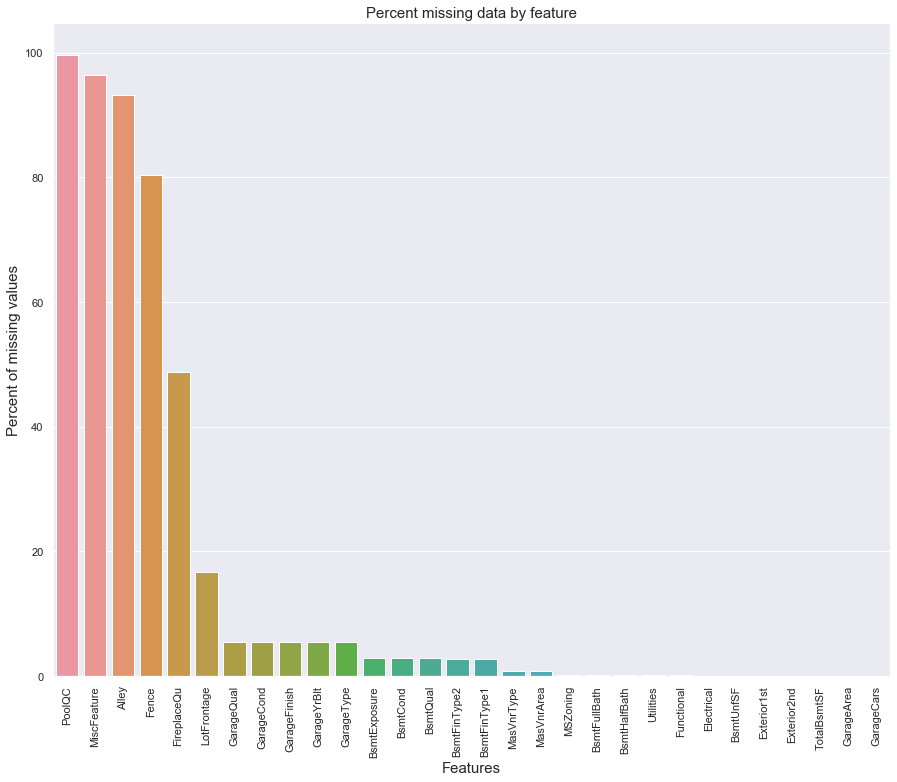

In [329]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

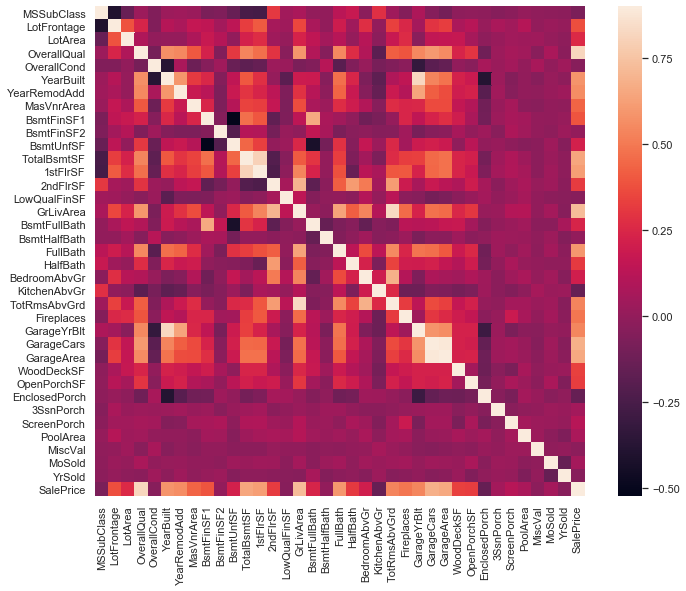

In [330]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [331]:

#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
#Alley: data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")
#Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")
#FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood ,
#we can fill in missing values by the median LotFrontage of the neighborhood.

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)
#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")



In [332]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [333]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [334]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))


Shape all_data: (2917, 78)


In [335]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [336]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [337]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)


There are 59 skewed numerical features to Box Cox transform


In [338]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [339]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [340]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [341]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [342]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [343]:

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [344]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [345]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [346]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [347]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [348]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)

ElasticNet score: 0.1116 (0.0074)

Kernel Ridge score: 0.1153 (0.0075)

Gradient Boosting score: 0.1177 (0.0080)

Xgboost score: 0.1151 (0.0072)

LGBM score: 0.1156 (0.0075)



In [349]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [350]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1091 (0.0075)



In [351]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [352]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1085 (0.0074)


In [353]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [354]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07803882799654165


In [355]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))


0.07894559653917806


In [356]:

model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

0.0730553246313014
RMSLE score on train data:
0.07540094709888284


In [357]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)